In [37]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import tensorflow as tf

In [14]:
import collections as co
from PIL import Image

In [49]:
import cv2
from skimage import io

##### Load data

In [3]:
os.listdir("./all/")

['.DS_Store', 'test', 'train', 'train.csv', 'sample_submission.csv']

In [4]:
sample_sub = pd.read_csv('./all/sample_submission.csv')

In [5]:
sample_sub.head()

,Image,Id
0,00028a005.jpg,new_whale w_23a388d w_9b5109b w_9c506f6 w_0369a5c
1,000dcf7d8.jpg,new_whale w_23a388d w_9b5109b w_9c506f6 w_0369a5c
2,000e7c7df.jpg,new_whale w_23a388d w_9b5109b w_9c506f6 w_0369a5c
3,0019c34f4.jpg,new_whale w_23a388d w_9b5109b w_9c506f6 w_0369a5c
4,001a4d292.jpg,new_whale w_23a388d w_9b5109b w_9c506f6 w_0369a5c


In [6]:
train_df = pd.read_csv('./all/train.csv')

In [7]:
train_df.head()

,Image,Id
0,0000e88ab.jpg,w_f48451c
1,0001f9222.jpg,w_c3d896a
2,00029d126.jpg,w_20df2c5
3,00050a15a.jpg,new_whale
4,0005c1ef8.jpg,new_whale


In [11]:
train_df.shape

(25361, 2)

In [10]:
print("Training set size:", len(os.listdir("./all/train/")))
print("Test set size:", len(os.listdir("./all/test/")))

Training set size: 25361
Test set size: 7960


In [12]:
print("Number of unique whales:", len(train_df.Id.unique()))

Number of unique whales: 5005


##### Investigate distribution of number of images per whale ID

In [34]:
id_count_df = train_df.groupby("Id", as_index=False)['Image'].count()
id_count_df = id_count_df.rename(columns={'Image':'Num_Images'})
id_count_df['density'] = id_count_df['Num_Images'] / np.sum(id_count_df['Num_Images'])
id_count_df = id_count_df.sort_values('density', ascending=False)
id_count_df['rank'] = range(id_count_df.shape[0])
id_count_df['log_rank'] = np.log(id_count_df['rank'] + 1)

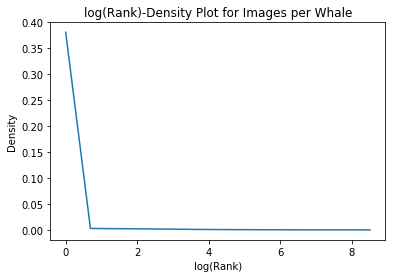

In [35]:
plt.plot(id_count_df['log_rank'],id_count_df['density'])
plt.xlabel('log(Rank)')
plt.ylabel('Density')
plt.title('log(Rank)-Density Plot for Images per Whale')
plt.show()

In [36]:
id_count_df.head(10)

,Id,Num_Images,density,rank,log_rank
0,new_whale,9664,0.381058,0,0.000000
712,w_23a388d,73,0.002878,1,0.693147
3029,w_9b5109b,65,0.002563,2,1.098612
3049,w_9c506f6,62,0.002445,3,1.386294
64,w_0369a5c,61,0.002405,4,1.609438
2175,w_700ebb4,57,0.002248,5,1.791759
1211,w_3de579a,54,0.002129,6,1.945910
1665,w_564a34b,51,0.002011,7,2.079442
4952,w_fd3e556,50,0.001972,8,2.197225
2648,w_88e4537,49,0.001932,9,2.302585


##### Investigate image size distribution

In [15]:
image_sizes = co.Counter([Image.open(f'./all/train/{filename}').size
                         for filename in os.listdir("./all/train")])

In [17]:
image_size_df = pd.DataFrame(list(image_sizes.most_common()),columns=['Image_Dim','count'])

In [20]:
#get density
image_size_df['density'] = image_size_df['count'] / np.sum(image_size_df['count'])
#get rank
image_size_df['rank'] = range(image_size_df.shape[0])
image_size_df['log_rank'] = np.log(image_size_df['rank'] + 1)

In [21]:
image_size_df.head(10)

,Image_Dim,count,density,rank,log_rank
0,"(1050, 700)",3330,0.131304,0,0.000000
1,"(1050, 600)",2549,0.100509,1,0.693147
2,"(1050, 450)",1556,0.061354,2,1.098612
3,"(1050, 525)",1303,0.051378,3,1.386294
4,"(700, 500)",667,0.026300,4,1.609438
5,"(1050, 591)",280,0.011041,5,1.791759
6,"(1050, 701)",265,0.010449,6,1.945910
7,"(1000, 667)",177,0.006979,7,2.079442
8,"(879, 584)",148,0.005836,8,2.197225
9,"(1050, 750)",136,0.005363,9,2.302585


In [30]:
print("Number of image sizes in train data:", image_size_df.shape[0])

Number of image sizes in train data: 5634


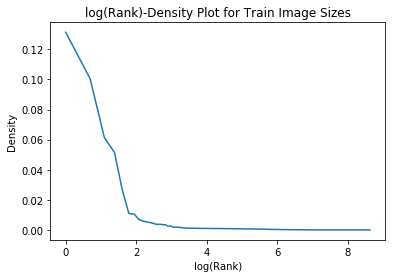

In [32]:
plt.plot(image_size_df['log_rank'],image_size_df['density'])
plt.xlabel('log(Rank)')
plt.ylabel('Density')
plt.title('log(Rank)-Density Plot for Train Image Sizes')
plt.show()

##### Repeat on test images

In [24]:
image_sizes_test = co.Counter([Image.open(f'./all/test/{filename}').size
                         for filename in os.listdir("./all/test")])

In [25]:
image_size_test_df = pd.DataFrame(list(image_sizes_test.most_common()),columns=['Image_Dim','count'])

In [26]:
#get density
image_size_test_df['density'] = image_size_test_df['count'] / np.sum(image_size_test_df['count'])
#get rank
image_size_test_df['rank'] = range(image_size_test_df.shape[0])
image_size_test_df['log_rank'] = np.log(image_size_test_df['rank'] + 1)

In [27]:
image_size_test_df.head(10)

,Image_Dim,count,density,rank,log_rank
0,"(1050, 700)",1258,0.158040,0,0.000000
1,"(1050, 600)",628,0.078894,1,0.693147
2,"(1050, 450)",524,0.065829,2,1.098612
3,"(1050, 525)",407,0.051131,3,1.386294
4,"(1050, 701)",149,0.018719,4,1.609438
5,"(700, 500)",144,0.018090,5,1.791759
6,"(1050, 591)",78,0.009799,6,1.945910
7,"(900, 600)",56,0.007035,7,2.079442
8,"(1050, 702)",46,0.005779,8,2.197225
9,"(1800, 700)",45,0.005653,9,2.302585


In [33]:
print("Number of image sizes in test data:", image_size_test_df.shape[0])

Number of image sizes in test data: 2516


##### Examine select images

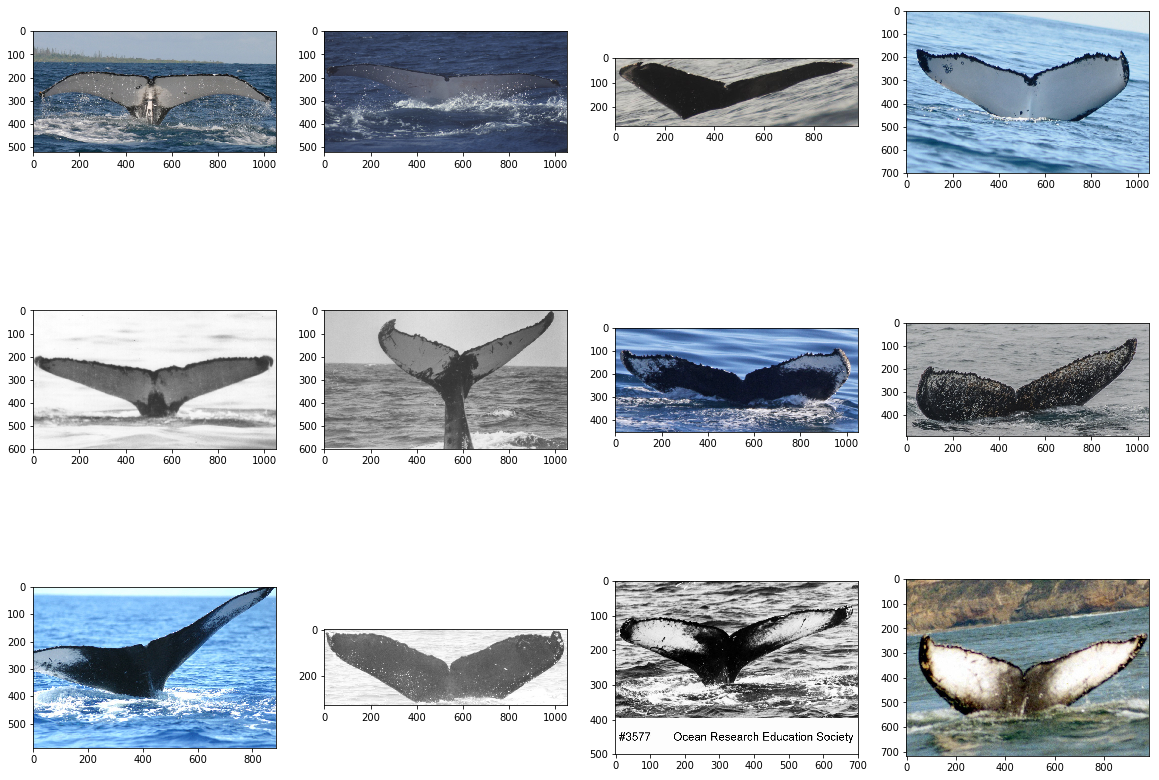

In [50]:
fig = plt.figure(figsize = (20,15))
for idx, img_name in enumerate(train_df[train_df['Id'] == 'new_whale']['Image'][:12]):
    y = fig.add_subplot(3,4,idx+1)
    img = cv2.imread('./all/train/{}'.format(img_name))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    y.imshow(img)
plt.show()